In [1]:
%load_ext autoreload

%autoreload 2
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn import metrics

# from mlxtend.plotting import plot_decision_regions
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from ast import literal_eval

import warnings
import numpy as np
from collections import OrderedDict

from lob_data_utils import lob, db_result, model, roc_results
from lob_data_utils.svm_calculation import lob_svm
import os


sns.set_style('whitegrid')
warnings.filterwarnings('ignore')

In [2]:
data_length = 10000
rs_params = [(0.1, 1.0)]
stocks = list(roc_results.result_cv_10000.keys())
data_dir = 'res_pca_gdf_que3'

In [3]:
def get_mean_scores(scores: dict) -> dict:
    mean_scores = {}
    for k, v in scores.items():
        mean_scores[k] = np.mean(v)
    return mean_scores

def get_score_for_clf(clf, df_test):
    x_test = df_test[['queue_imbalance']]
    y_test = df_test['mid_price_indicator'].values
    return model.test_model(clf, x_test, y_test)

def get_logistic_regression(stock, data_length):
    df, df_test = lob.load_prepared_data(
        stock, data_dir='../gaussian_filter/data', cv=False, length=data_length)
    clf = LogisticRegression()
    train_x = df[['queue_imbalance']]

    scores = model.validate_model(clf, train_x, df['mid_price_indicator'])
    res = {
        **get_mean_scores(scores),
        'stock': stock,
        'kernel': 'logistic',
    }
    test_scores = get_score_for_clf(clf, df_test)
    return {**res, **test_scores}

In [4]:
df_res = pd.DataFrame()
for stock in stocks:
    for r, s in rs_params:
    #pd.read_csv('svm_features_{}_len{}_r{}_s{}.csv'.format(stock, data_length, r, s))
        filename = data_dir + '/svm_pca_gdf_{}_len{}_r{}_s{}_K20-30.csv'.format(stock, data_length, r, s)
        if os.path.exists(filename):
            df_temp = pd.read_csv(filename)
            df_temp['r'] = [r] * len(df_temp)
            df_temp['s'] = [s] * len(df_temp)
            df_res = df_res.append(df_temp)
#df_res.drop(columns=['Unnamed: 0'], inplace=True)
columns = ['C', 'f1', 'features', 'gamma', 'kappa',
           'matthews', 'roc_auc', 'stock',
       'test_f1', 'test_kappa', 'test_matthews', 'test_roc_auc', 'r', 's']
df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)

,C,f1,features,gamma,kappa,matthews,roc_auc,stock,test_f1,test_kappa,test_matthews,test_roc_auc,r,s
37,100.0,0.589733,pca_gdf_20-30_que3,0.100,0.153765,0.160051,0.577065,1956,0.601573,0.139068,0.141098,0.569575,0.1,1.0
36,100.0,0.626608,pca_gdf_20-30_que3,0.010,0.147638,0.156580,0.573967,13061,0.640162,0.092176,0.099023,0.545188,0.1,1.0
36,100.0,0.598578,pca_gdf_20-30_que3,0.010,0.147526,0.153821,0.573992,1472,0.656952,0.099075,0.108883,0.548149,0.1,1.0
36,100.0,0.496323,pca_gdf_20-30_que3,0.010,0.145675,0.153076,0.572535,7858,0.441276,0.158917,0.177818,0.577937,0.1,1.0
25,1.0,0.595251,pca_gdf_20-30_que3,10.000,0.147096,0.150139,0.573664,9761,0.613464,0.130046,0.133305,0.564845,0.1,1.0
25,1.0,0.524453,pca_gdf_20-30_que3,10.000,0.133113,0.136735,0.566864,9270,0.540785,0.087739,0.087784,0.543883,0.1,1.0
23,1.0,0.635448,pca_gdf_20-30_que3,0.100,0.126910,0.135904,0.563226,12456,0.598001,0.068196,0.070525,0.533886,0.1,1.0
44,1000.0,0.523692,pca_gdf_20-30_que3,0.100,0.131491,0.134615,0.566109,1113,0.569122,0.147017,0.147537,0.573716,0.1,1.0
37,100.0,0.585248,pca_gdf_20-30_que3,0.100,0.132571,0.133878,0.566371,4060,0.564176,0.092198,0.093111,0.546264,0.1,1.0
35,100.0,0.571001,pca_gdf_20-30_que3,0.001,0.131689,0.132897,0.566174,2651,0.581121,0.147326,0.147331,0.573676,0.1,1.0


In [5]:
log_res = []
for stock in stocks:
    log_res.append(get_logistic_regression(stock, data_length))
df_log_res = pd.DataFrame(log_res)
df_log_res['stock'] = df_log_res['stock'].values.astype(np.int)
df_log_res.index = df_log_res['stock'].values.astype(np.int)

In [6]:
df_gdf_best = df_res[columns].sort_values(by='matthews', ascending=False).groupby('stock').head(1)
df_gdf_best['stock'] = df_gdf_best['stock'].values.astype(np.int)
df_gdf_best.index = df_gdf_best['stock'].values.astype(np.int)

In [7]:
df_all = pd.merge(df_gdf_best, df_log_res, on='stock', suffixes=['_svm', '_log'])

In [8]:
all_columns = ['matthews_svm', 'matthews_log',  'test_matthews_svm',  'test_matthews_log', 
       'roc_auc_svm', 'roc_auc_log', 'test_roc_auc_svm',  'test_roc_auc_log', 'stock' ]
df_all[all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
0,0.160051,0.152838,0.141098,0.133788,0.577065,0.574598,0.569575,0.566273,1956
1,0.156580,0.143094,0.099023,0.110004,0.573967,0.571097,0.545188,0.555039,13061
2,0.153821,0.148600,0.108883,0.118223,0.573992,0.572888,0.548149,0.557251,1472
3,0.153076,0.146384,0.177818,0.171235,0.572535,0.572852,0.577937,0.584512,7858
4,0.150139,0.144700,0.133305,0.132214,0.573664,0.571695,0.564845,0.564652,9761
5,0.136735,0.129431,0.087784,0.070337,0.566864,0.563917,0.543883,0.534968,9270
6,0.135904,0.132153,0.070525,0.094105,0.563226,0.565317,0.533886,0.547029,12456
7,0.134615,0.130301,0.147537,0.146515,0.566109,0.564461,0.573716,0.573201,1113
8,0.133878,0.136666,0.093111,0.096997,0.566371,0.567394,0.546264,0.547942,4060
9,0.132897,0.125634,0.147331,0.162023,0.566174,0.562340,0.573676,0.580890,2651


In [9]:
df_all['matthews_diff'] = df_all['matthews_svm'] -  df_all['matthews_log']
df_all['matthews_test_diff'] = df_all['test_matthews_svm'] - df_all['test_matthews_log']

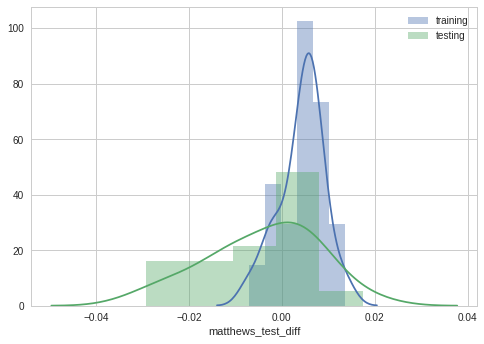

In [10]:
sns.distplot(df_all['matthews_diff'], label='training')
sns.distplot(df_all['matthews_test_diff'], label='testing')
plt.legend()

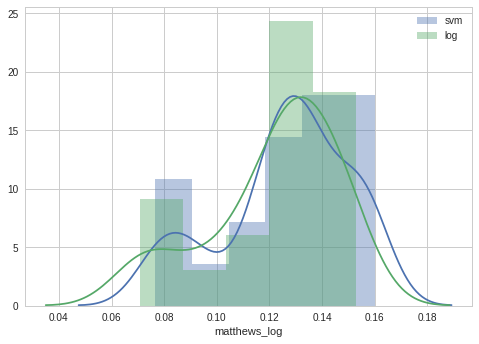

In [11]:
sns.distplot(df_all['matthews_svm'], label='svm')
sns.distplot(df_all['matthews_log'], label='log')
plt.legend()

In [12]:
df_all['matthews_diff'].sum(), df_all['matthews_test_diff'].sum()

(0.08495299321988461, -0.08533017758553274)

In [13]:
len(df_all[df_all['matthews_svm'] > df_all['matthews_log']][all_columns]), len(df_all[df_all['test_matthews_svm'] > df_all['test_matthews_log']]), len(df_all)

(16, 10, 20)

In [14]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
1,0.156580,0.143094,0.099023,0.110004,0.573967,0.571097,0.545188,0.555039,13061
2,0.153821,0.148600,0.108883,0.118223,0.573992,0.572888,0.548149,0.557251,1472
6,0.135904,0.132153,0.070525,0.094105,0.563226,0.565317,0.533886,0.547029,12456
8,0.133878,0.136666,0.093111,0.096997,0.566371,0.567394,0.546264,0.547942,4060
9,0.132897,0.125634,0.147331,0.162023,0.566174,0.562340,0.573676,0.580890,2651
11,0.125627,0.132624,0.076183,0.086034,0.554248,0.563571,0.532282,0.538530,13003
12,0.121875,0.120071,0.124505,0.129138,0.558534,0.559200,0.561588,0.564415,9094
14,0.117637,0.111922,0.074089,0.086004,0.557422,0.554976,0.537002,0.543004,9063
15,0.117190,0.107065,0.086087,0.115421,0.555886,0.552507,0.541465,0.556709,9069
16,0.096795,0.098354,0.037414,0.058480,0.544341,0.548135,0.516972,0.528850,9061


In [15]:
len(df_all[df_all['roc_auc_svm'] > df_all['roc_auc_log']][all_columns]), len(df_all[df_all['test_roc_auc_svm'] > df_all['test_roc_auc_log']][all_columns]), len(df_all)

(13, 9, 20)

In [16]:
df_all[df_all['test_matthews_svm'] < df_all['test_matthews_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
1,0.156580,0.143094,0.099023,0.110004,0.573967,0.571097,0.545188,0.555039,13061
2,0.153821,0.148600,0.108883,0.118223,0.573992,0.572888,0.548149,0.557251,1472
6,0.135904,0.132153,0.070525,0.094105,0.563226,0.565317,0.533886,0.547029,12456
8,0.133878,0.136666,0.093111,0.096997,0.566371,0.567394,0.546264,0.547942,4060
9,0.132897,0.125634,0.147331,0.162023,0.566174,0.562340,0.573676,0.580890,2651
11,0.125627,0.132624,0.076183,0.086034,0.554248,0.563571,0.532282,0.538530,13003
12,0.121875,0.120071,0.124505,0.129138,0.558534,0.559200,0.561588,0.564415,9094
14,0.117637,0.111922,0.074089,0.086004,0.557422,0.554976,0.537002,0.543004,9063
15,0.117190,0.107065,0.086087,0.115421,0.555886,0.552507,0.541465,0.556709,9069
16,0.096795,0.098354,0.037414,0.058480,0.544341,0.548135,0.516972,0.528850,9061


In [17]:
df_all[df_all['test_roc_auc_svm'] < df_all['test_roc_auc_log']][all_columns]

,matthews_svm,matthews_log,test_matthews_svm,test_matthews_log,roc_auc_svm,roc_auc_log,test_roc_auc_svm,test_roc_auc_log,stock
1,0.156580,0.143094,0.099023,0.110004,0.573967,0.571097,0.545188,0.555039,13061
2,0.153821,0.148600,0.108883,0.118223,0.573992,0.572888,0.548149,0.557251,1472
3,0.153076,0.146384,0.177818,0.171235,0.572535,0.572852,0.577937,0.584512,7858
6,0.135904,0.132153,0.070525,0.094105,0.563226,0.565317,0.533886,0.547029,12456
8,0.133878,0.136666,0.093111,0.096997,0.566371,0.567394,0.546264,0.547942,4060
9,0.132897,0.125634,0.147331,0.162023,0.566174,0.562340,0.573676,0.580890,2651
11,0.125627,0.132624,0.076183,0.086034,0.554248,0.563571,0.532282,0.538530,13003
12,0.121875,0.120071,0.124505,0.129138,0.558534,0.559200,0.561588,0.564415,9094
14,0.117637,0.111922,0.074089,0.086004,0.557422,0.554976,0.537002,0.543004,9063
15,0.117190,0.107065,0.086087,0.115421,0.555886,0.552507,0.541465,0.556709,9069
